In [1]:
import nltk
import re
from nltk.stem import PorterStemmer
from os import getcwd
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
import numpy as np


nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
def process_text(texto):
    stemmer = PorterStemmer()
    stopwords_spanish = stopwords.words('spanish')
    # remove stock market tickers like $GE
    texto = re.sub(r'\$\w*', '', texto)
    # remove old style retweet text "RT"
    texto = re.sub(r'^RT[\s]+', '', texto)
    # remove hyperlinks
    texto = re.sub(r'https?://[^\s\n\r]+', '', texto)
    # remove hashtags
    # only removing the hash # sign from the word
    texto = re.sub(r'#', '', texto)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    texto_tokens = tokenizer.tokenize(texto)

    texto_clean = []
    for word in texto_tokens:
        if (word not in stopwords_spanish and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            stem_word = stemmer.stem(word)  # stemming word
            texto_clean.append(stem_word)
    return texto_clean

In [3]:

from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters

texto = "Entretanto la sólida nave en su curso ligero " \
 + " se enfrentó a las Sirenas: un soplo feliz la impelía" \
+ " mas de pronto cesó aquella brisa, una calma profunda" \
+ " se sintió alrededor: algún dios alisaba las olas." \
+ " Levantáronse entonces mis hombres, plegaron la vela," \
+ " la dejaron caer al fondo del barco y, sentándose al remo," \
+ " blanqueaban de espumas el mar con las palas pulidas." \
+ " Yo entretanto cogí el bronce agudo, corté un pan de cera" \
+ " y, partiéndolo en trozos pequeños, los fui pellizcando" \
+ " con mi mano robusta: ablandáronse pronto, que eran" \
+ " poderosos mis dedos y el fuego del sol de lo alto." \
+ " Uno a uno a mis hombres con ellos tapé los oídos" \
+ " y, a su vez, me ataron de piernas y manos" \
+ " en el mástil, derecho, con fuertes maromas y, luego," \
+ " a azotar con los remos volvieron al mar espumante." \
+ " Ya distaba la costa no más que el alcance de un grito" \
+ " y la nave crucera volaba, mas bien percibieron" \
+ " las Sirenas su paso y alzaron su canto sonoro:" \
+ " Llega acá, de los dánaos honor, gloriosísimo Ulises," \
+ " de tu marcha refrena el ardor para oír nuestro canto," \
+ " porque nadie en su negro bajel pasa aquí sin que atienda" \
+ " a esta voz que en dulzores de miel de los labios nos fluye."


In [4]:
print(process_text(texto))

['entretanto', 'sólida', 'nave', 'curso', 'ligero', 'enfrentó', 'sirena', 'soplo', 'feliz', 'impelía', 'ma', 'pronto', 'cesó', 'aquella', 'brisa', 'calma', 'profunda', 'sintió', 'alrededor', 'algún', 'dio', 'alisaba', 'ola', 'levantárons', 'entonc', 'hombr', 'plegaron', 'vela', 'dejaron', 'caer', 'fondo', 'barco', 'sentándos', 'remo', 'blanqueaban', 'espuma', 'mar', 'pala', 'pulida', 'entretanto', 'cogí', 'bronc', 'agudo', 'corté', 'pan', 'cera', 'partiéndolo', 'trozo', 'pequeño', 'pellizcando', 'mano', 'robusta', 'ablandárons', 'pronto', 'poderoso', 'dedo', 'fuego', 'sol', 'alto', 'hombr', 'tapé', 'oído', 'vez', 'ataron', 'pierna', 'mano', 'mástil', 'derecho', 'fuert', 'maroma', 'luego', 'azotar', 'remo', 'volvieron', 'mar', 'espumant', 'distaba', 'costa', 'alcanc', 'grito', 'nave', 'crucera', 'volaba', 'ma', 'bien', 'percibieron', 'sirena', 'paso', 'alzaron', 'canto', 'sonoro', 'llega', 'acá', 'dánao', 'honor', 'gloriosísimo', 'ulis', 'marcha', 'refrena', 'ardor', 'oír', 'canto', 'na

In [5]:

def build_freqs(texto):

    # Start with an empty dictionary and populate it by looping over the text
    # and over all processed words in the document.
    freqs = {}
    for word in process_text(texto):

            if word in freqs:
                freqs[word] += 1
            else:
                freqs[word] = 1
    return freqs

In [6]:
frecuencias = build_freqs(texto)

In [7]:
frecuencias

{'entretanto': 2,
 'sólida': 1,
 'nave': 2,
 'curso': 1,
 'ligero': 1,
 'enfrentó': 1,
 'sirena': 2,
 'soplo': 1,
 'feliz': 1,
 'impelía': 1,
 'ma': 2,
 'pronto': 2,
 'cesó': 1,
 'aquella': 1,
 'brisa': 1,
 'calma': 1,
 'profunda': 1,
 'sintió': 1,
 'alrededor': 1,
 'algún': 1,
 'dio': 1,
 'alisaba': 1,
 'ola': 1,
 'levantárons': 1,
 'entonc': 1,
 'hombr': 2,
 'plegaron': 1,
 'vela': 1,
 'dejaron': 1,
 'caer': 1,
 'fondo': 1,
 'barco': 1,
 'sentándos': 1,
 'remo': 2,
 'blanqueaban': 1,
 'espuma': 1,
 'mar': 2,
 'pala': 1,
 'pulida': 1,
 'cogí': 1,
 'bronc': 1,
 'agudo': 1,
 'corté': 1,
 'pan': 1,
 'cera': 1,
 'partiéndolo': 1,
 'trozo': 1,
 'pequeño': 1,
 'pellizcando': 1,
 'mano': 2,
 'robusta': 1,
 'ablandárons': 1,
 'poderoso': 1,
 'dedo': 1,
 'fuego': 1,
 'sol': 1,
 'alto': 1,
 'tapé': 1,
 'oído': 1,
 'vez': 1,
 'ataron': 1,
 'pierna': 1,
 'mástil': 1,
 'derecho': 1,
 'fuert': 1,
 'maroma': 1,
 'luego': 1,
 'azotar': 1,
 'volvieron': 1,
 'espumant': 1,
 'distaba': 1,
 'costa': 1,
 

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(texto)


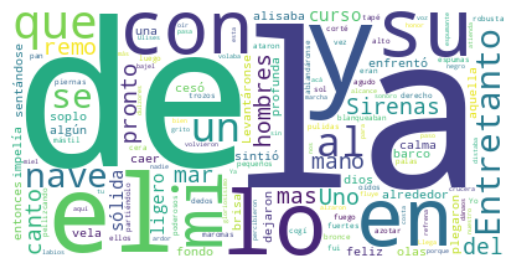

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
text_limpio = process_text(texto)
text_limpio = " ".join(text for text in text_limpio)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text_limpio)

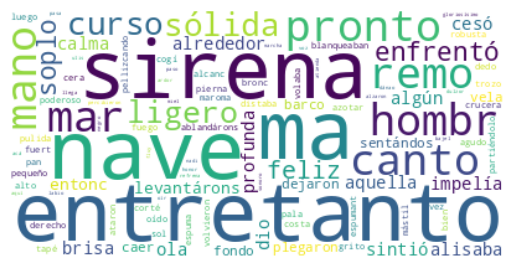

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
texto2 = "Canto ¡oh Musa! de Aquiles, hijo de Peleo, la cólera funesta que causó infinitos males a los griegos; que precipitó " \
  + " a los infiernos las almas valerosas de muchos héroes, y los hizo servir de pasto a los perros y a todas las aves de rapiña " \
   + " así se cumplió la voluntad de Júpiter desde que, por primera vez, separó una disputa al hijo de Atreo, jefe de los griegos y al divino Aquiles." \
 + " Ahora ¿cuál de los dioses los incitó a esa contienda? El hijo de Júpiter y de Latona: irritado contra el rey, suscitó en el ejército una terrible enfermedad;" \
  + " y los pueblos morían porque Atrida había despreciado al sacerdote Crises. Dirigiéndose este a las rápidas naves de los griegos, con el fin de libertar" \
   + " a su hija, con un rico rescate, llevando la banda del certero Apolo en el cetro de oro, suplicaba así a todos los griegos y sobre todo a los dos hijos de Atreo," \
    + " caudillos de pueblos:" \
 + " ¡Atridas y griegos de brillante armadura! los dioses, moradores del Olimpo, os concedan tomar la ciudad de Príamo, y retornar felizmente a vuestros hogares;" \
  + " pero libertadme a mi hija querida y aceptad el rescate, venerando al hijo de Júpiter, el certero Apolo." \
 + " Entonces todos los demás griegos proclamaron que se respetara al sacerdote, y se recibiera el magnífico rescate, pero Agamenón no quería acceder," \
  + " y lo despidió con desprecio, añadiendo estas duras palabras:" \
 + " Viejo, que no te encuentre yo junto a nuestras espaciosas naves, por haberte detenido o por haber vuelto otra vez, no sea que no te valga el cetro" \
  + " ni la banda del dios. En cuanto a ella, no la libertaré hasta que no llegue a la vejez, en mi casa, en la Argólida, lejos de su patria, bordando" \
   + " la tela y compartiendo mi lecho. Anda, vete, no me irrites, porque no estarías seguro." \
 + " Así dijo: atemorizóse el anciano y obedeció la orden. Partió callado, siguiendo la orilla de la mar rugiente; pero cuando estuvo lejos le rogó mucho " \
 + " al soberano Apolo, hijo de Latona, la de hermosa cabellera." \
 + " ¡Escúchame, dios del arco de plata, que proteges a Crisa y a la divina Cila, y que reinas en Ténedos, Apolo Esminteo! Si alguna vez adorné tu templo" \
  + " para hacértelo grato, si alguna vez quemé en tu obsequio los perniles cubiertos de grasa de toros y de cabras, cúmpleme este voto: expíen " \
  + " los griegos mis lágrimas con tus dardos!." \
 + " Tal fue su súplica, y Febo Apolo la escuchó. Bajó de la cima del Olimpo con el ánimo irritado, llevando en los hombros el arco y la repleta aljaba:" \
  + " al agitado andar resonaban las flechas del enojado dios: parecía la noche que se acercaba." \
 + " Sentándose luego a cierta distancia de las naves, lanzó un dardo: ¡terrible fue el ruido del arco de plata! Sus primeras" \
  + " víctimas fueron los mulos y los ágiles perros; pero luego sus dardos mortales hirieron a los hombres; y muchas piras de cadáveres ardían siempre en el campamento." \
 + " Los dardos del dios atravesaron el ejército nueve días seguidos. El décimo, Aquiles convocó al pueblo a una asamblea: Juno," \
  + " la diosa de blancos brazos, conmovida por la mortandad de los griegos, le sugirió esa idea. Una vez convocados y reunidos," \
   + " levantóse en medio de ellos Aquiles, de pies ligeros, y habló así:" \
 + " Atrida, llegó según creo, para nosotros el día de abandonar la empresa, escapando al menos de la muerte; pues la guerra y la peste juntamente rinden a los griegos."


In [9]:
frecuencias2 = build_freqs(texto2)

In [10]:
frecuencias2

{'canto': 1,
 '¡': 4,
 'oh': 1,
 'musa': 1,
 'aquil': 4,
 'hijo': 6,
 'peleo': 1,
 'cólera': 1,
 'funesta': 1,
 'causó': 1,
 'infinito': 1,
 'male': 1,
 'griego': 9,
 'precipitó': 1,
 'infierno': 1,
 'alma': 1,
 'valerosa': 1,
 'héroe': 1,
 'hizo': 1,
 'servir': 1,
 'pasto': 1,
 'perro': 2,
 'toda': 1,
 'ave': 1,
 'rapiña': 1,
 'así': 4,
 'cumplió': 1,
 'voluntad': 1,
 'júpiter': 3,
 '\x97': 1,
 'primera': 2,
 'vez': 5,
 'separó': 1,
 'disputa': 1,
 'atreo': 2,
 'jefe': 1,
 'divino': 1,
 'ahora': 1,
 '¿': 1,
 'cuál': 1,
 'dios': 2,
 'incitó': 1,
 'contienda': 1,
 'latona': 2,
 'irritado': 2,
 'rey': 1,
 'suscitó': 1,
 'ejército': 2,
 'terribl': 2,
 'enfermedad': 1,
 'pueblo': 3,
 'morían': 1,
 'atrida': 3,
 'despreciado': 1,
 'sacerdot': 2,
 'crise': 1,
 'dirigiéndos': 1,
 'rápida': 1,
 'nave': 3,
 'fin': 1,
 'libertar': 1,
 'hija': 2,
 'rico': 1,
 'rescat': 3,
 'llevando': 2,
 'banda': 2,
 'certero': 2,
 'apolo': 5,
 'cetro': 2,
 'oro': 1,
 'suplicaba': 1,
 'do': 1,
 'caudillo': 1,
 '

In [11]:
texto3 =  "Dos preguntas, señor presidente. La primera:" \
 + " Empieza a surgir un escenario no previsto, ni por la corte ni por el Ejecutivo ni por el Legislativo: los más de cinco mil trabajadores que cada día " \
 + " están más conscientes del escenario que implica el austericidio y se están organizando en lo que podría ser la primera huelga judicial de México." \
 + " Por lo pronto, el líder del Sindicato Único de Trabajadores del Poder Judicial alistó una cascada de amparos y de manifestaciones como ya se están" \
  + " queriendo iniciar los empleados de Zacatecas. Los trabajadores son muy bravos y, de verdad, no están como subestimando. ¿Qué opinión nos da de esto?" \
 + " PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: ¿Hablas sobre lo del presupuesto?" \
 + " INTERLOCUTORA: Sí, del fideicomiso." \
 + " PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Ah, sí. Bueno, es natural que los ministros de la corte estén haciendo, pues una promoción para que no" \
  + " se les modifique el presupuesto, es lo más lógico, si se acostumbraron a vivir con privilegios." \
 + " Es lo que está pasando también en el país, los que se dedicaban a robar, los que recibían atenciones especiales, vivían con privilegios," \
  + " y todo eso se terminó, pues están molestos y claro que van a echar a andar toda una estrategia para evitar que les quiten sus privilegios." \
   + " Inclusive me decían que ya están haciendo acuerdos con el bloque conservador en la Cámara de Diputados para que de inmediato los legisladores" \
   + "  del bloque conservador presenten un recurso de inconstitucionalidad, ¡imagínense!, lo que está en la Constitución."


In [12]:
frecuencias3 = build_freqs(texto3)

In [13]:
frecuencias3

{'do': 1,
 'pregunta': 1,
 'señor': 1,
 'president': 3,
 'primera': 2,
 'empieza': 1,
 'surgir': 1,
 'escenario': 2,
 'previsto': 1,
 'cort': 2,
 'ejecutivo': 1,
 'legislativo': 1,
 'cinco': 1,
 'mil': 1,
 'trabajador': 3,
 'cada': 1,
 'día': 1,
 'conscient': 1,
 'implica': 1,
 'austericidio': 1,
 'organizando': 1,
 'podría': 1,
 'ser': 1,
 'huelga': 1,
 'judici': 2,
 'méxico': 1,
 'pronto': 1,
 'líder': 1,
 'sindicato': 1,
 'único': 1,
 'poder': 1,
 'alistó': 1,
 'cascada': 1,
 'amparo': 1,
 'manifestacion': 1,
 'queriendo': 1,
 'iniciar': 1,
 'empleado': 1,
 'zacateca': 1,
 'bravo': 1,
 'verdad': 1,
 'subestimando': 1,
 '¿': 2,
 'opinión': 1,
 'da': 1,
 'andré': 2,
 'manuel': 2,
 'lópez': 2,
 'obrador': 2,
 'habla': 1,
 'presupuesto': 2,
 'interlocutora': 1,
 'fideicomiso': 1,
 'ah': 1,
 'bueno': 1,
 'natur': 1,
 'ministro': 1,
 'haciendo': 2,
 'pue': 2,
 'promoción': 1,
 'modifiqu': 1,
 'lógico': 1,
 'si': 1,
 'acostumbraron': 1,
 'vivir': 1,
 'privilegio': 3,
 'pasando': 1,
 'paí':

In [26]:
def normalize(d):
  factor= 1.0/sum(d.get(key, 0) for key in d )
  for k in d:
    d[k] = d[k]*factor
  return d

In [15]:
frecuencias = normalize(frecuencias)

In [16]:
print(frecuencias)

{'entretanto': 0.017699115044247787, 'sólida': 0.008849557522123894, 'nave': 0.017699115044247787, 'curso': 0.008849557522123894, 'ligero': 0.008849557522123894, 'enfrentó': 0.008849557522123894, 'sirena': 0.017699115044247787, 'soplo': 0.008849557522123894, 'feliz': 0.008849557522123894, 'impelía': 0.008849557522123894, 'ma': 0.017699115044247787, 'pronto': 0.017699115044247787, 'cesó': 0.008849557522123894, 'aquella': 0.008849557522123894, 'brisa': 0.008849557522123894, 'calma': 0.008849557522123894, 'profunda': 0.008849557522123894, 'sintió': 0.008849557522123894, 'alrededor': 0.008849557522123894, 'algún': 0.008849557522123894, 'dio': 0.008849557522123894, 'alisaba': 0.008849557522123894, 'ola': 0.008849557522123894, 'levantárons': 0.008849557522123894, 'entonc': 0.008849557522123894, 'hombr': 0.017699115044247787, 'plegaron': 0.008849557522123894, 'vela': 0.008849557522123894, 'dejaron': 0.008849557522123894, 'caer': 0.008849557522123894, 'fondo': 0.008849557522123894, 'barco': 0.

In [17]:
frecuencias2 = normalize(frecuencias2)
frecuencias3 = normalize(frecuencias3)

In [18]:
dot_product = sum(frecuencias[key]*frecuencias2.get(key, 0) for key in frecuencias)

In [19]:
dot_product2 = sum(frecuencias3[key]*frecuencias2.get(key, 0) for key in frecuencias3)

In [20]:
print(dot_product*100)
print(dot_product2*100)

0.07398343909171101
0.05133886351968439


In [21]:
a = sum(frecuencias[key]**2 for key in frecuencias)
print(a)
b = sum(frecuencias2[key]**2 for key in frecuencias2)
print(b)
c = sum(frecuencias3[key]**2 for key in frecuencias3)
print(c)

0.010415850888871496
0.006110358660477089
0.011651719511333971


In [22]:
dot_product/(np.sqrt(a*b))

0.09273715897461124

In [23]:
dot_product2/np.sqrt(b*c)

0.060844018316829555

In [24]:
#funcion similitud coseno

import math

def cosine_sim(doc1,doc2):
    numerator = 0
    d_doc1 = 0
    for key1,val1 in doc1.items():
        numerator += val1*doc2.get(key1,0.0)
        d_doc1 += val1*val1
    d_doc2 = 0
    for val2 in doc2.values():
        d_doc2 += val2*val2
    return numerator/math.sqrt(d_doc1*d_doc2)

In [25]:
d1 = cosine_sim(frecuencias,frecuencias2)
d2 = cosine_sim(frecuencias,frecuencias3)
d3= cosine_sim(frecuencias3,frecuencias2)
print(d1)
print(d2)
print(d3)

0.09273715897461124
0.013500883914929132
0.060844018316829555


Utilizemos el corpus de nltk.
seleccionando Moby dick

In [27]:
nltk.download()
from nltk.book import *


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_eng Averaged Perceptron Tagger (JSON)
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] averaged_perceptron_tagger_rus Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ 

       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /root/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /root/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Unzipping corpora/dependency_treebank.zip.
       | Downloading package genesis to /root/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /root/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package ieer to /root/nltk_data...
   


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


<FreqDist with 19317 samples and 260819 outcomes>


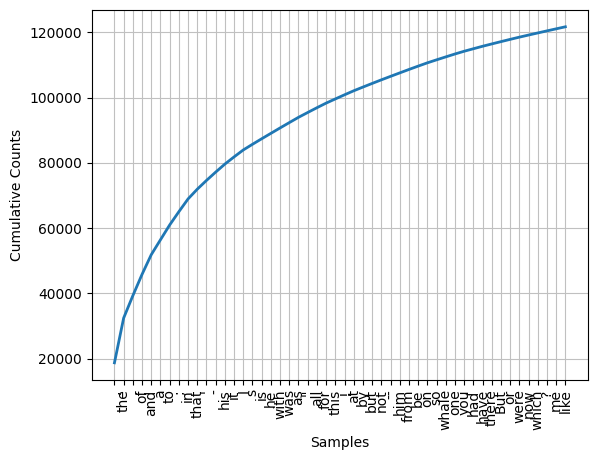

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [28]:

fdist1 = FreqDist(text1)
vocabulary1 = fdist1.keys()
print(fdist1)

fdist1.plot(50, cumulative=True)

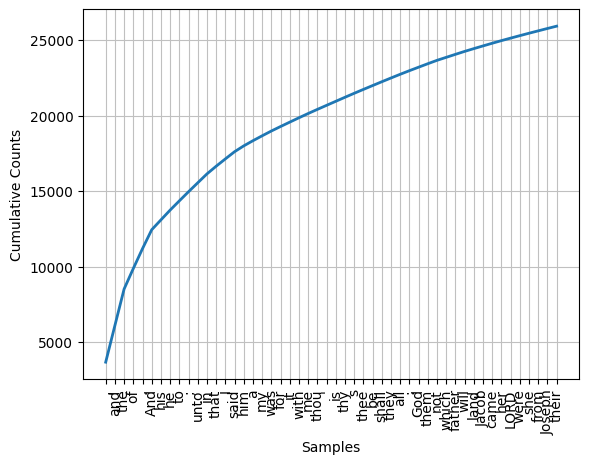

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [29]:

fdist3 = FreqDist(text3)
vocabulary3 = fdist3.keys()


fdist3.plot(50, cumulative=True)

In [5]:
text1.concordance("monsters")

Displaying 9 of 9 matches:
rise a great many Whales and other monsters of the sea , appeared . Among the 
us enemies , Whales , sharks , and monsters , arm ' d in front or jaw , With s
On one occasion I saw two of these monsters ( whales ) probably male and femal
egs , as it were , swim the hugest monsters of the sea , even as ships once sa
l sperm whales , and that the more monsters he slew by so much the more he mul
ss of marshy meads ; even so these monsters swam , making a strange , grassy ,
 in his forward turn beholding the monsters he chased , and in the after one t
ata there are found the fossils of monsters now almost completely extinct ; th
es to the existing breeds of sea - monsters ; but at the same time bearing on 


In [30]:
text1.similar("monsters")

whale that leviathan fire air sight parts place end and him world them
name word this more devil whales case


In [31]:
text2.common_contexts(["monstrous", "very"]) #palabras antes y después

am_glad a_pretty a_lucky is_pretty be_glad


In [32]:
print(len(text1))
print(len(text3))


260819
44764


In [33]:
len(set(text1))

19317

In [34]:
len(text1)/len(set(text1))

13.502044830977896

In [35]:
100 *text1.count("monster")/len(text1)

0.018786974875296663

In [36]:
from nltk.corpus import brown
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [13]:

cfd = nltk.ConditionalFreqDist( (genre, word)
for genre in brown.categories()
for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [18]:
t1 = cosine_sim(fdist1,fdist3)
t1

0.9099939171979605